In [1]:
import pandas as pd
import re
from ipywidgets import interact
import ipywidgets as widgets
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2. Read in the candy data and look at the top 5 rows.

In [2]:
candy = pd.read_csv('data/top_halloween_candy.csv',sep = ',')
candy.head(5)

,state,top_candy,top_candy_pounds,second_place,second_place_pounds,third_place,third_place_pounds
0,Florida,Skittles,660000lbs,Snickers,543529lbs,Reese's Peanut Butter Cups,194117lbs
1,Kansas,M&M's,247500lbs,Reese's Peanut Butter Cups,210375lbs,Dubble Bubble Gum,111375lbs
2,New York,Sour Patch Kids,198016lbs,Candy Corn,95047lbs,Reese's Peanut Butter Cups,39603lbs
3,Washington,Salt Water Taffy,207900lbs,Tootsie Pops,171211lbs,Hershey Kisses,61147lbs
4,California,Assorted Salt Water Taffy,1650000lbs,M&M's,1188000lbs,Skittles,726000lbs


3. Clean up the `top_candy_pounds`, `second_place_pounds`, and `third_place_pounds` columns by removing the "lbs" at the end and converting to a numeric type.

In [3]:
def get_quan(num):
    try:
        return float(re.sub('lbs',"",num))
    except:
        return None

In [4]:
def clean_data(df):
    df["top_candy_pounds"] = [get_quan(num) for num in candy.top_candy_pounds]
    df["second_place_pounds"] = [get_quan(num) for num in candy.second_place_pounds]
    df["third_place_pounds"] = [get_quan(num) for num in candy.third_place_pounds]
    return df

In [5]:
candy = clean_data(candy)

4. Create a visualization (your choice) to show the top 3 candies for the state of Tennessee. **Optional Bonus:** Make a widget that allows the user to choose a state and have the visualization update to show the top three candies for the chosen state.

In [6]:
@interact(state = candy.state.sort_values())

def make_plot(state):
    candy_sub = candy[candy.state == state]
    candy_sub.set_index(['state'],inplace = True)
    candy_sub.plot(kind='barh',title = "Top 3 Candies by Quantity - "+state+" (lbs)");


interactive(children=(Dropdown(description='state', options=('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Cali…

5. Create a new column, `total_pounds`, to show the combined weight of 1st, 2nd, and 3rd place candies consumed per state.

In [7]:
candy["total_pounds"]=candy[['top_candy_pounds','second_place_pounds','third_place_pounds']].sum(axis=1)

6. Which state consumes the most of its 1st, 2nd, and 3rd place candies combined (greatest combined weight)?

    The result shows **California** consumes the most of its 1st, 2nd, and 3rd place candies combined (greatest combined weight).

In [8]:
top_state = candy.sort_values(by=["total_pounds"],ascending=False).head(1)
top_state

,state,top_candy,top_candy_pounds,second_place,second_place_pounds,third_place,third_place_pounds,total_pounds
4,California,Assorted Salt Water Taffy,1650000.0,M&M's,1188000.0,Skittles,726000.0,3564000.0


7. Read in the population data and merge it with the candy data.

In [9]:
population_est2017 = pd.read_csv('data/population_est2017.csv',sep = ',')
data = pd.merge (candy,population_est2017,left_on="state",right_on="NAME")

8. Calculate a new column, `per_capita` to show the average weight of 1st, 2nd, and 3rd place candies (combined) consumed per person in each state.

In [10]:
data["per_capita"]= data["total_pounds"]/data["POPESTIMATE2017"]

9. Create a histogram showing the distribution of `per_capita` values by state.

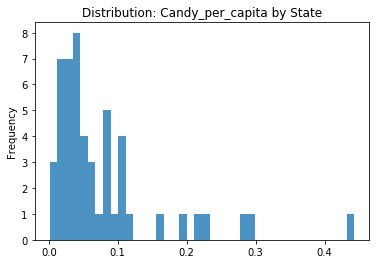

In [11]:
ax = data["per_capita"].plot.hist(bins=40,alpha=0.8,title="Distribution: Candy_per_capita by State")

10. Which state has the greatest consumption of its 1st, 2nd, and 3rd place candies per capita?
    
    The result shows **Hawaii** has the greatest consumption of its 1st, 2nd, and 3rd place candies per capita.

In [12]:
top_state_per_capita = data.sort_values(by=["per_capita"],ascending=False).head(1)
top_state_per_capita

,state,top_candy,top_candy_pounds,second_place,second_place_pounds,third_place,third_place_pounds,total_pounds,NAME,POPESTIMATE2017,per_capita
47,Hawaii,Hershey Kisses,271042.0,Hawaiian Host,255984.0,Milky Way,105405.0,632431.0,Hawaii,1427538,0.443022


11. For this state, what is the consumption per capita of *each* of the top-3 candies?

The consumption per capita of *each* of the top-3 candies is **0.189, 0.179, 0.074 in Hawaii**. 

In [13]:
top_state_per_capita["top_per_capita"]=top_state_per_capita["top_candy_pounds"]/top_state_per_capita["POPESTIMATE2017"]
top_state_per_capita["sec_per_capita"]=top_state_per_capita["second_place_pounds"]/top_state_per_capita["POPESTIMATE2017"]
top_state_per_capita["third_per_capita"]=top_state_per_capita["third_place_pounds"]/top_state_per_capita["POPESTIMATE2017"]
top_state_per_capita

,state,top_candy,top_candy_pounds,second_place,second_place_pounds,third_place,third_place_pounds,total_pounds,NAME,POPESTIMATE2017,per_capita,top_per_capita,sec_per_capita,third_per_capita
47,Hawaii,Hershey Kisses,271042.0,Hawaiian Host,255984.0,Milky Way,105405.0,632431.0,Hawaii,1427538,0.443022,0.189867,0.179319,0.073837


12. Find the five candies that show up most frequently (1st, 2nd, and 3rd places combined) in the dataset. Create a bar plot to show the number of times these five candies appear in the dataset.

Text(0,0.5,'Top 5 Brand')

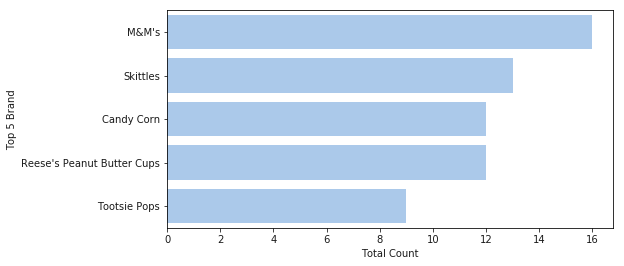

In [14]:
top = candy["top_candy"].tolist()
sec = candy["second_place"].tolist()
third = candy["third_place"].tolist()
brand = top+sec+third

brand=pd.DataFrame(brand,columns = ["brand"]).reset_index()

top5_brand=brand.groupby(by=["brand"]).count().reset_index().sort_values(by='index',ascending = False).rename(columns={"index": "count"}).reset_index(drop=True).head(5)

f, ax = plt.subplots(figsize=(8, 4))
sns.set_color_codes("pastel")
ax = sns.barplot(x="count", y="brand", data=top5_brand,color="b")
ax.set_xlabel('Total Count')
ax.set_ylabel('Top 5 Brand')

13. Find all unique candies -- those that appear in a state's top-3 list but _do not_ appear in any other state's list. Report both the candy name and the state in whose list it appears.

    The unique brands that appeared once are **Life Savers, Hawaiian Host, Swedish Fish, and Assorted Salt Water Taffy**.

In [15]:
df = brand.groupby(by=["brand"]).count().reset_index().sort_values(by='index',ascending = False).rename(columns={"index": "count"}).reset_index(drop=True)
onetime = df[df["count"] == 1]
onetime_brand = onetime["brand"]
onetime_brand = onetime_brand.reset_index(drop=True).tolist()
onetime_brand

['Life Savers', 'Hawaiian Host', 'Swedish Fish', 'Assorted Salt Water Taffy']

Those unique brands exist in the below states: **California, Georgia, Delaware, and Hawaii**

In [16]:
state1 = data[data["top_candy"].isin(onetime_brand)]
state2 = data[data["second_place"].isin(onetime_brand)]
state3 = data[data["third_place"].isin(onetime_brand)]

frames = [state1, state2, state3]
result = pd.concat(frames)
result1= result[['state','top_candy','second_place','third_place']]
result1

,state,top_candy,second_place,third_place
4,California,Assorted Salt Water Taffy,M&M's,Skittles
8,Georgia,Swedish Fish,Hershey Kisses,Lemonheads
39,Delaware,Life Savers,Skittles,Candy Corn
47,Hawaii,Hershey Kisses,Hawaiian Host,Milky Way
